# Lingpy - Polynesian example

This example follows the [lingpy](https://github.com/lingpy/lingpy-tutorial/blob/master/notebook.ipynb) tutorial. Several steps in that either did not work or caused problems due to version updates, so this has neen updated to work with the current version (**lingpy 2.6.13**).

The [lingpy documentation](https://lingpy.org/docu) is the only place I could find information about some of the features of the code, for example [Lexstat](https://lingpy.org/docu/compare/lexstat.html) provides some critical information about how the internal workings operate.

## Setup

Install any required dependencies and import packages

In [1]:
#!pip install lingpy
#!pip install re
#!pip install lingpy
#!pip install pandas

In [125]:
# !pip install lingpy
from lingpy import * # We're just importing everything from lingpy for simplicity
import pandas as pd
from lingpy.sequence.sound_classes import ipa2tokens
import re
import os

In [127]:
## We'll store data in a local 'data' directory
os.makedirs('data', exist_ok=True)

Directory 'data' created successfully


### Read data

You can download the [polynesian data](https://github.com/lingpy/lingpy-tutorial/raw/refs/heads/master/polynesian.tsv) directly and look at it. There is a separate [East polynesian dataset](https://github.com/lingpy/lingpy-tutorial/raw/refs/heads/master/east-polynesian.tsv) that the example was designed for.

Here we read it from the remote directly, but you can just change the link below to where you saved your data.

The data are sorted by 'concept' which is ok. Running `print(d.sort_values(by='ID').head())` shows that the data are complete, i.e. there are no missing 'ID's which would be a problem for pyling.

In [133]:
d = pd.read_table('https://github.com/lingpy/lingpy-tutorial/raw/refs/heads/master/polynesian.tsv',skiprows=3,comment='#') # Skip the top 3 rows which are comments or empty lines
print(d.head())
d.to_csv(os.path.join('data','polynesian.tsv'),index=False,sep='\t') # Save the data as received

     ID         DOCULECT DOCULECT_IN_SOURCE GLOTTOCODE  CONCEPTICON_ID  \
0     8  Vaeakau_Taumako    Vaeakau-Taumako   pile1238            1705   
1   251        Wallisian         Uvea, East   wall1257            1705   
2   725            Maori              Maori   maor1246            1705   
3   949   Kapingamarangi     Kapingamarangi   kapi1249            1705   
4  1169         Tahitian  Tahitian (Modern)   tahi1242            1705   

  CONCEPT VALUE  FORM               SOURCE  BVD_ID  COGID  BORROWING VARIANTS  \
0   Eight  valu  valu  Hovdhaugen-375-2009   89600    663        NaN      NaN   
1   Eight  valu  valu               POLLEX   90435    663        NaN      NaN   
2   Eight  waru  waru        Biggs-85-2005   87872    663        NaN      NaN   
3   Eight  walu  walu               POLLEX   90454    663        NaN     waru   
4   Eight  va'u  va'u       Clark-173-2005  102829    663        NaN     varu   

    TOKENS  
0  v a l u  
1  v a l u  
2  w a r u  
3  w a l u  
4  

Note that this data contains all of the tokens already, but to simulate the process of tokenization and conversion to IPA we will remove all of this information, leaving only the [cldf](https://cldf.clld.org/) required information: 'doculect' which is the language identifier, 'concept' which is the english word, and 'form' which is the word as spoken.

In [134]:
dsimple=d[['ID','CONCEPT','DOCULECT','FORM']]
dsimple=dsimple.dropna()
dsimple.loc[:,'ID']=dsimple.index
dsimple = dsimple.rename(columns={
    'DOCULECT': 'doculect',
    'CONCEPT': 'concept',
    'FORM': 'form'
})
dsimple.head()

,ID,concept,doculect,form
0,0,Eight,Vaeakau_Taumako,valu
1,1,Eight,Wallisian,valu
2,2,Eight,Maori,waru
3,3,Eight,Kapingamarangi,walu
4,4,Eight,Tahitian,va'u


## Converting data to 'IPA'-like tokens that can be processed by pyling

Mant characters are invalid for linguistic analysis and must be removed. There are some examples in these data, which we can use to show how to remove invalid content.

But first, we will make a function that converts an entire column of a dataframe to IPA, which is a little complex because it otherwise creates 'tokens', i.e. keeps the result as a list of single sounds.

In [135]:
def ipa2tokens_list(d):
    ## Takes a list of dataframe column
    ## Apply transformation to words that are present, and collapse that back to a string
    ret = [''.join(ipa2tokens(x)) for x in d]
    return ret

**PRE-PROCESSING** 

The issues below were identified by a series of errors or warnings thrown up by Lingpy. You can try omitting them and seeing how they affect the results.

In [136]:
dsimple['form']=[x.replace('-','') for x in dsimple['form']] # No - symbols
dsimple['form']=[x.replace('=','') for x in dsimple['form']] # No = symbols
dsimple['form']=[re.sub(r'\d', '', x) for x in dsimple['form']] # No numbers
dsimple['form']=[re.sub(r"\s+", '.', x) for x in dsimple['form']] # No spaces - replace these with a short pause ( though this is stripped from the IPA)
dsimple['form']=[x.lower() for x in dsimple['form']] # No capital letters

This section converts to IPA and saves the data to disk.

In [153]:

# Convert to IPA
dsimple['ipa']=ipa2tokens_list(dsimple['form'])
# Remove whitespace in the 'doculect' and 'concept' columns
dsimple['doculect']=[re.sub(r"\s+", '_', x) for x in dsimple['doculect']]
dsimple['concept']=[re.sub(r"\s+", '_', x) for x in dsimple['concept']]
# Save the results to a local file. 
dsimple.to_csv(os.path.join('data','polynesian_processed.tsv'),sep='\t',index=False)
## We'll print an extract for comparison and checking; this can be helpful for debugging as well
print(dsimple.loc[0:40,:])

    ID concept         doculect            form            ipa
0    0   Eight  Vaeakau_Taumako            valu           valu
1    1   Eight        Wallisian            valu           valu
2    2   Eight            Maori            waru           waru
3    3   Eight   Kapingamarangi            walu           walu
4    4   Eight         Tahitian            va'u           va'u
5    5   Eight             Emae            βaru           βaru
6    6   Eight          Rapanui            va'u           va'u
7    7   Eight        Mangareva            varu           varu
8    8   Eight         Luangiua            valu           valu
9    9   Eight           Tongan            valu           valu
10  10   Eight          Tikopia            varu           varu
11  11   Eight         Sikaiana            valu           valu
12  12   Eight  North_Marquesan            va'u           va'u
13  13   Eight     East_Futunan            valu           valu
14  14   Eight         Pukapuka            valu        

# Main section: Working with Lingpy

Lingpy can operate on datafiles or darta in its own format.

We can access the data in Lingpy format using `Wordlist`. This is a 'Dictionary' object that has been extended with additional features. It is a little unweildy.

In [138]:
d = Wordlist('data/polynesian_processed.tsv')
# count number of languages, number of rows, number of concepts
print(
    "Wordlist has {0} languages and {1} concepts across {2} rows.".format(
        d.width, d.height, len(d)))


Wordlist has 30 languages and 210 concepts across 7315 rows.


This is how we interact with the wordlist:

In [154]:

# get all indices for concept "eight", `row` refers to the concepts here, while `col` refers to languages
eight = d.get_dict(row='Eight', entry='ipa')
for taxon in ['Emae', 'Rennell_Bellona', 
              'Tuvalu', 'Sikaiana', 'Penryhn',  'Kapingamarangi']:
    print(
        '{0:20}'.format(taxon), '  \t', ', '.join(eight[taxon]))

Emae                   	 βaru
Rennell_Bellona        	 baŋgu
Tuvalu                 	 valu
Sikaiana               	 valu
Penryhn                	 varu
Kapingamarangi         	 walu


## Cognate detection

For cognate detection, we can operate on our wordlist directly:

In [141]:
lex = LexStat(d,check=True)

2025-05-20 09:41:41,883 [INFO] No obvious errors found in the data.


Or equivelently we can run on the raw data format:

In [142]:
lex = LexStat('data/polynesian_processed.tsv',check=True)

2025-05-20 09:42:02,226 [INFO] No obvious errors found in the data.


**Cognate detection**

This is very simple to run, though complex to master.

We first (and only once) have to run `lex.get_scorer()` to tell Pyling about the score function it will use. This is complicated, but involves checking the data against itself so is run **once per dataset**. We can then run cognate detection with a number of **methods**.

Pyling is very "chatty" so we are going to reduce the amount of information it prints to the screen. This is not needed. If you get rid of it, make sure you also get rid on the indentation, because this is meaningful in python.

Here we use the clustering (i.e. cognate detection) algorithm 'infomap' which requires a 'similarity threshold' to operate.

Note also that we only try to cluster sounds for identical concepts. So even if the concepts 'sisters daughter' and 'sister in-laws daughter' have the same word, they will not be identified as cognate in this process.

In [143]:
from contextlib import redirect_stderr # We're going to redirect the chat to a log file
with open("lex_lexstat_log.log", 'w') as f:
    with redirect_stderr(f):
        lex.get_scorer() # Get the scorer (only run once)
        ## Now do the clustering. Note 
        lex.cluster(method='lexstat', threshold=0.55, cluster_method='infomap', ref='cogid')

2025-05-20 09:48:09,160 [INFO] Calculating alignments for pair Anuta / Anuta.
2025-05-20 09:48:09,175 [INFO] Calculating alignments for pair Anuta / East_Futunan.
2025-05-20 09:48:09,190 [INFO] Calculating alignments for pair Anuta / Emae.
2025-05-20 09:48:09,199 [INFO] Calculating alignments for pair Anuta / Futuna_Aniwa.
2025-05-20 09:48:09,208 [INFO] Calculating alignments for pair Anuta / Hawaiian.
2025-05-20 09:48:09,217 [INFO] Calculating alignments for pair Anuta / Kapingamarangi.
2025-05-20 09:48:09,225 [INFO] Calculating alignments for pair Anuta / Luangiua.
2025-05-20 09:48:09,236 [INFO] Calculating alignments for pair Anuta / Mangareva.
2025-05-20 09:48:09,249 [INFO] Calculating alignments for pair Anuta / Maori.
2025-05-20 09:48:09,258 [INFO] Calculating alignments for pair Anuta / Mele_Fila.
2025-05-20 09:48:09,265 [INFO] Calculating alignments for pair Anuta / Niuean.
2025-05-20 09:48:09,273 [INFO] Calculating alignments for pair Anuta / North_Marquesan.
2025-05-20 09:48:

We can examine our results directly by using the dictionary returned as 'lex'. This is a very manual process and you could instead save things to disk and look in Excel.

In [155]:
current_print=0 # We will keep track of how many lines we print to screen
# Print results
for k in lex:
    if lex[k, 'cogid'] is not None: 
        print(lex[k, 'language'], lex[k, 'concept'], lex[k, 'form'], lex[k, 'cogid'])
        current_print+=1
    if current_print >= 40: # Limit the lines to 30
        break

Wallisian Eight valu 1
Maori Eight waru 1
Kapingamarangi Eight walu 1
Tahitian Eight va'u 1
Emae Eight βaru 1
Rapanui Eight va'u 1
Mangareva Eight varu 1
Luangiua Eight valu 1
Tongan Eight valu 1
Tikopia Eight varu 1
Sikaiana Eight valu 1
North_Marquesan Eight va'u 1
East_Futunan Eight valu 1
Pukapuka Eight valu 1
Mele_Fila Eight eβaru 1
Ra’ivavae Eight vagu 1
Tuamotuan Eight varu 1
Niuean Eight valu 1
Rurutuan Eight vaʔu 1
Futuna_Aniwa Eight varu 1
Hawaiian Eight walu 1
Rarotongan Eight varu 1
Penryhn Eight varu 1
Nukuria Eight varu 1
Samoan Eight valu 1
Rennell_Bellona Eight baŋgu 1
Tuvalu Eight valu 1
Anuta Eight varu 1
Vaeakau_Taumako Fifty gatoaelima 2
Maori Fifty rima.tekau 3
Mangareva Fifty rima.rongo'uru 3
Tongan Fifty nimangofulu 3
East_Futunan Fifty kaulima 2
Pukapuka Fifty tinolima 2
Pukapuka Fifty laulima 2
Pukapuka Fifty limangaulu 3
Ra’ivavae Fifty pae.ʔahugu 4
Niuean Fifty lima.fiha 2
Rurutuan Fifty pae.ʔaʔuru 4
Hawaiian Fifty kanalima 2


The number at the end is the 'cluster ID'. So all words are seen as cognate. This looks correct. Two very different looking words for Fifty are not cognate, which also looks correct.

We can run a different 'model' easily:

In [146]:
# run the dolgopolsky (turchin) analysis, which is threshold-free
with open("lex_turchin_log.log", 'w') as f:
    with redirect_stderr(f):
        lex.cluster(method='turchin', ref='turchinid')

2025-05-20 09:53:04,802 [INFO] Analyzing words for concept <Eight>.
2025-05-20 09:53:04,828 [INFO] Analyzing words for concept <Fifty>.
2025-05-20 09:53:04,832 [INFO] Analyzing words for concept <Five>.
2025-05-20 09:53:04,845 [INFO] Analyzing words for concept <Four>.
2025-05-20 09:53:04,854 [INFO] Analyzing words for concept <I>.
2025-05-20 09:53:04,871 [INFO] Analyzing words for concept <Nine>.
2025-05-20 09:53:04,879 [INFO] Analyzing words for concept <One>.
2025-05-20 09:53:04,889 [INFO] Analyzing words for concept <One_Hundred>.
2025-05-20 09:53:04,897 [INFO] Analyzing words for concept <One_Thousand>.
2025-05-20 09:53:04,909 [INFO] Analyzing words for concept <Seven>.
2025-05-20 09:53:04,917 [INFO] Analyzing words for concept <Six>.
2025-05-20 09:53:04,924 [INFO] Analyzing words for concept <Ten>.
2025-05-20 09:53:04,940 [INFO] Analyzing words for concept <Three>.
2025-05-20 09:53:04,950 [INFO] Analyzing words for concept <Twenty>.
2025-05-20 09:53:04,954 [INFO] Analyzing words 

And a final different model, for comparison:

In [147]:
with open("lex_editdist_log.log", 'w') as f:
    with redirect_stderr(f):
        lex.cluster(method="edit-dist", threshold=0.75, ref='editid')

2025-05-20 09:53:23,902 [INFO] Analyzing words for concept <Eight>.
2025-05-20 09:53:23,926 [INFO] Analyzing words for concept <Fifty>.
2025-05-20 09:53:23,931 [INFO] Analyzing words for concept <Five>.
2025-05-20 09:53:23,941 [INFO] Analyzing words for concept <Four>.
2025-05-20 09:53:23,949 [INFO] Analyzing words for concept <I>.
2025-05-20 09:53:23,963 [INFO] Analyzing words for concept <Nine>.
2025-05-20 09:53:23,969 [INFO] Analyzing words for concept <One>.
2025-05-20 09:53:23,976 [INFO] Analyzing words for concept <One_Hundred>.
2025-05-20 09:53:23,981 [INFO] Analyzing words for concept <One_Thousand>.
2025-05-20 09:53:23,990 [INFO] Analyzing words for concept <Seven>.
2025-05-20 09:53:23,995 [INFO] Analyzing words for concept <Six>.
2025-05-20 09:53:24,000 [INFO] Analyzing words for concept <Ten>.
2025-05-20 09:53:24,012 [INFO] Analyzing words for concept <Three>.
2025-05-20 09:53:24,018 [INFO] Analyzing words for concept <Twenty>.
2025-05-20 09:53:24,021 [INFO] Analyzing words 

Finally lets take a look at the cognate calculations on these data by all models:

In [148]:
current_print=0
# Print results
for k in lex:
    if lex[k, 'cogid'] is not None: 
        print(lex[k, 'language'], lex[k, 'concept'], lex[k, 'form'], lex[k, 'cogid'],
                                                 lex[k, 'turchinid'],
                                                 lex[k, 'editid'])      
        current_print+=1
    if current_print >= 40:
        break

Wallisian Eight valu 1 1 1
Maori Eight waru 1 1 1
Kapingamarangi Eight walu 1 1 1
Tahitian Eight va'u 1 12 1
Emae Eight βaru 1 3 1
Rapanui Eight va'u 1 12 1
Mangareva Eight varu 1 1 1
Luangiua Eight valu 1 1 1
Tongan Eight valu 1 1 1
Tikopia Eight varu 1 1 1
Sikaiana Eight valu 1 1 1
North_Marquesan Eight va'u 1 12 1
East_Futunan Eight valu 1 1 1
Pukapuka Eight valu 1 1 1
Mele_Fila Eight eβaru 1 10 1
Ra’ivavae Eight vagu 1 18 1
Tuamotuan Eight varu 1 1 1
Niuean Eight valu 1 1 1
Rurutuan Eight vaʔu 1 20 1
Futuna_Aniwa Eight varu 1 1 1
Hawaiian Eight walu 1 1 1
Rarotongan Eight varu 1 1 1
Penryhn Eight varu 1 1 1
Nukuria Eight varu 1 1 1
Samoan Eight valu 1 1 1
Rennell_Bellona Eight baŋgu 1 19 1
Tuvalu Eight valu 1 1 1
Anuta Eight varu 1 1 1
Vaeakau_Taumako Fifty gatoaelima 2 33 2
Maori Fifty rima.tekau 3 23 4
Mangareva Fifty rima.rongo'uru 3 23 4
Tongan Fifty nimangofulu 3 32 4
East_Futunan Fifty kaulima 2 21 2
Pukapuka Fifty tinolima 2 27 2
Pukapuka Fifty laulima 2 34 2
Pukapuka Fifty 

We can see that the very fast method 'Turchin' is not doing a great job. The other methods are in pretty close agreement.

The following is how to extract information about a particular concept. (We can make this nicer by making a function!)

In [157]:
import math
# show the cognate sets, stored in "turchinid" for the words for "Eight"
eight = lex.get_dict(row='Eight') # get a dictionary with language as key for concept "eight"
print("{0:20} \t {1} \t{2}\t {3}\t {4}".format('doculect', 
                                               'form', 
                                               'cogid',
                                               'turchinid',
                                               'editid'))
for k, v in eight.items():
    if v: # Remove languages that are missing
        idx = v[0] # index of the word, it gives us access to all data
        print("{0:20} \t {1} \t{2}\t {3}\t {4}".format(lex[idx, 'doculect'], 
                                                 lex[idx, 'form'], 
                                                 lex[idx, 'cogid'],
                                                 lex[idx, 'turchinid'],
                                                 lex[idx, 'editid']))



doculect             	 form 	cogid	 turchinid	 editid
Wallisian            	 valu 	1	 1	 1
Maori                	 waru 	1	 1	 1
Kapingamarangi       	 walu 	1	 1	 1
Tahitian             	 va'u 	1	 12	 1
Emae                 	 βaru 	1	 3	 1
Rapanui              	 va'u 	1	 12	 1
Mangareva            	 varu 	1	 1	 1
Luangiua             	 valu 	1	 1	 1
Tongan               	 valu 	1	 1	 1
Tikopia              	 varu 	1	 1	 1
Sikaiana             	 valu 	1	 1	 1
North_Marquesan      	 va'u 	1	 12	 1
East_Futunan         	 valu 	1	 1	 1
Pukapuka             	 valu 	1	 1	 1
Mele_Fila            	 eβaru 	1	 10	 1
Ra’ivavae            	 vagu 	1	 18	 1
Tuamotuan            	 varu 	1	 1	 1
Niuean               	 valu 	1	 1	 1
Rurutuan             	 vaʔu 	1	 20	 1
Futuna_Aniwa         	 varu 	1	 1	 1
Hawaiian             	 walu 	1	 1	 1
Rarotongan           	 varu 	1	 1	 1
Penryhn              	 varu 	1	 1	 1
Nukuria              	 varu 	1	 1	 1
Samoan               	 valu 	1	 1	 1
Rennell_Bellon

In [159]:
lex.output('tsv', filename=os.path.join('data','polynesian_cognate_detected'))

2025-05-20 20:21:26,078 [INFO] Data has been written to file <data/polynesian_cognate_detected.tsv>.


In [172]:
lexdf=pd.read_table(os.path.join('data','polynesian_cognate_detected.tsv'),skiprows=2,comment='#')
lexdf.head()

,ID,CONCEPT,DOCULECT,FORM,IPA,TOKENS,SONARS,PROSTRINGS,CLASSES,LANGID,NUMBERS,WEIGHTS,DUPLICATES,COGID,TURCHINID,EDITID
0,1,Eight,Wallisian,valu,valu,v a l u,3 7 5 7,AXBZ,BALY,30,30.B.C 30.A.V 30.L.C 30.Y.V,2.0 1.5 1.75 0.8,0,1,1,1
1,2,Eight,Maori,waru,waru,w a r u,6 7 5 7,AXBZ,WARY,9,9.W.C 9.A.V 9.R.C 9.Y.V,2.0 1.5 1.75 0.8,0,1,1,1
2,3,Eight,Kapingamarangi,walu,walu,w a l u,6 7 5 7,AXBZ,WALY,6,6.W.C 6.A.V 6.L.C 6.Y.V,2.0 1.5 1.75 0.8,0,1,1,1
3,4,Eight,Tahitian,va'u,va'u,v a 'u,3 7 7,AXZ,BAY,24,24.B.C 24.A.V 24.Y.V,2.0 1.5 0.8,0,1,12,1
4,5,Eight,Emae,βaru,βaru,β a r u,3 7 5 7,AXBZ,BARY,3,3.B.C 3.A.V 3.R.C 3.Y.V,2.0 1.5 1.75 0.8,0,1,3,1


In [174]:
import pandas as pd
import numpy as np
from itertools import combinations

# Get unique list of languages
languages = sorted(lexdf['DOCULECT'].unique())
lang_idx = {lang: i for i, lang in enumerate(languages)}

# Initialize matrix
matrix = np.zeros((len(languages), len(languages)), dtype=int)

# Group by cognate set
for cogid, group in lexdf.groupby('COGID'):
    langs = group['DOCULECT'].unique()
    for lang1, lang2 in combinations(langs, 2):
        i, j = lang_idx[lang1], lang_idx[lang2]
        matrix[i][j] += 1
        matrix[j][i] += 1  # Because it's undirected

# Optional: fill diagonal with how many unique cognate sets each language has
for lang in languages:
    matrix[lang_idx[lang]][lang_idx[lang]] = lexdf[lexdf['DOCULECT'] == lang]['COGID'].nunique()

# Turn into a pandas DataFrame
adj_df = pd.DataFrame(matrix, index=languages, columns=languages)
adj_df.head()
# Show or save
adj_df.to_csv(os.path.join('data','cognate_adjacency_matrix.csv'))

,Anuta,East_Futunan,Emae,Futuna_Aniwa,Hawaiian,Kapingamarangi,Luangiua,Mangareva,Maori,Mele_Fila,...,Rurutuan,Samoan,Sikaiana,Tahitian,Tikopia,Tongan,Tuamotuan,Tuvalu,Vaeakau_Taumako,Wallisian
Anuta,215,154,113,119,113,123,131,125,112,100,...,94,156,132,85,161,134,130,139,125,150
East_Futunan,154,266,136,137,124,131,139,135,118,111,...,100,166,146,91,168,147,145,146,129,190
Emae,113,136,183,117,96,103,105,104,94,111,...,84,124,104,78,125,113,109,103,99,128
Futuna_Aniwa,119,137,117,233,108,116,119,111,114,109,...,97,134,118,87,133,115,119,120,121,132
Hawaiian,113,124,96,108,226,103,101,138,138,92,...,131,135,109,119,123,106,148,118,110,122


In [175]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [176]:
# Remove the index/column labels for PCA
X = adj_df.values

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

In [189]:
ncomp=15
pca = PCA(n_components=ncomp)
components = pca.fit_transform(X_scaled)
# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

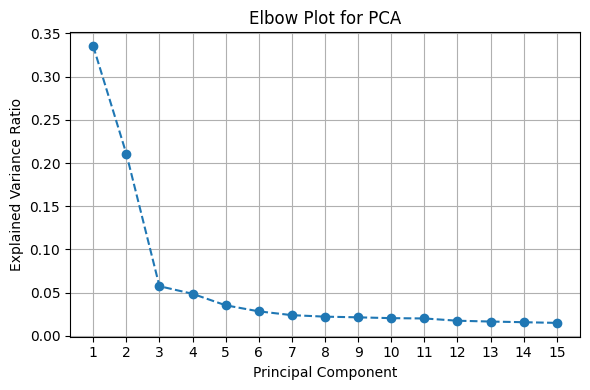

In [190]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, ncomp+1), explained_variance, marker='o', linestyle='--')
plt.xticks(range(1, ncomp+1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.tight_layout()
plt.show()

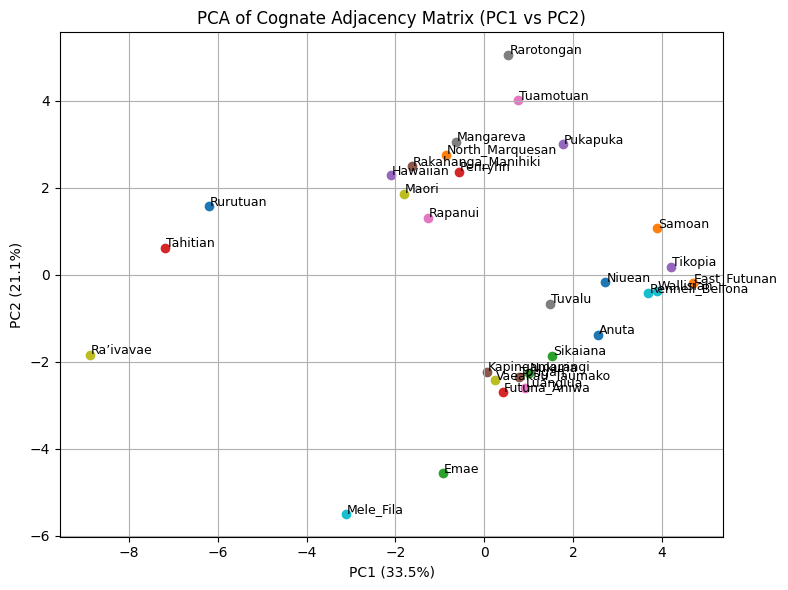

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot only the first two PCs
for i, lang in enumerate(adj_df.index):
    x, y = components[i, 0], components[i, 1]
    plt.scatter(x, y, label=lang)
    plt.text(x + 0.02, y + 0.02, lang, fontsize=9)

plt.title("PCA of Cognate Adjacency Matrix (PC1 vs PC2)")
plt.xlabel("PC1 ({:.1f}%)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PC2 ({:.1f}%)".format(pca.explained_variance_ratio_[1] * 100))
plt.grid(True)
plt.tight_layout()
plt.show()

In [195]:
" ".join(list(adj_df.index))

'Anuta East_Futunan Emae Futuna_Aniwa Hawaiian Kapingamarangi Luangiua Mangareva Maori Mele_Fila Niuean North_Marquesan Nukuria Penryhn Pukapuka Rakahanga_Manihiki Rapanui Rarotongan Ra’ivavae Rennell_Bellona Rurutuan Samoan Sikaiana Tahitian Tikopia Tongan Tuamotuan Tuvalu Vaeakau_Taumako Wallisian'

In [227]:
def date_line_remove (geo):
    geo["Longitude2"]=[(x-360 if x>0 else x) for x in geo["Longitude"]]
    return geo

polynesia_geo=pd.read_table(os.path.join('data','east_polynesia_geo.tsv'))
polynesia_geo=date_line_remove(polynesia_geo)
polynesia_geo

,Language,Latitude,Longitude,Notes,Longitude2
0,Anuta,-11.6112,169.8498,"Anuta Island, Solomon Islands",-190.1502
1,East Futunan,-14.3013,-178.0909,Wallis and Futuna,-178.0909
2,Emae,-17.0667,168.4000,"Emae Island, Vanuatu",-191.6000
3,Futuna-Aniwa,-19.2540,169.6000,"Aniwa Island, Vanuatu",-190.4000
4,Hawaiian,19.8968,-155.5828,"Hawaii, United States",-155.5828
5,Kapingamarangi,1.0667,154.7833,"Kapingamarangi Atoll, Micronesia",-205.2167
6,Luangiua,-5.2667,159.3500,"Ontong Java Atoll, Solomon Islands",-200.6500
7,Mangareva,-23.1057,-134.9595,"Mangareva Island, French Polynesia",-134.9595
8,Maori,-44.4333,168.6167,"South Island, New Zealand",-191.3833
9,Mele-Fila,-17.6966,168.2500,"Mele Village, Efate Island, Vanuatu",-191.7500


In [199]:
#!pip install cartopy

Resolved 16 packages in 686ms                                        
Prepared 2 packages in 2.42s                                             
Installed 2 packages in 36ms                                
 + cartopy==0.24.1
 + pyshp==2.3.1


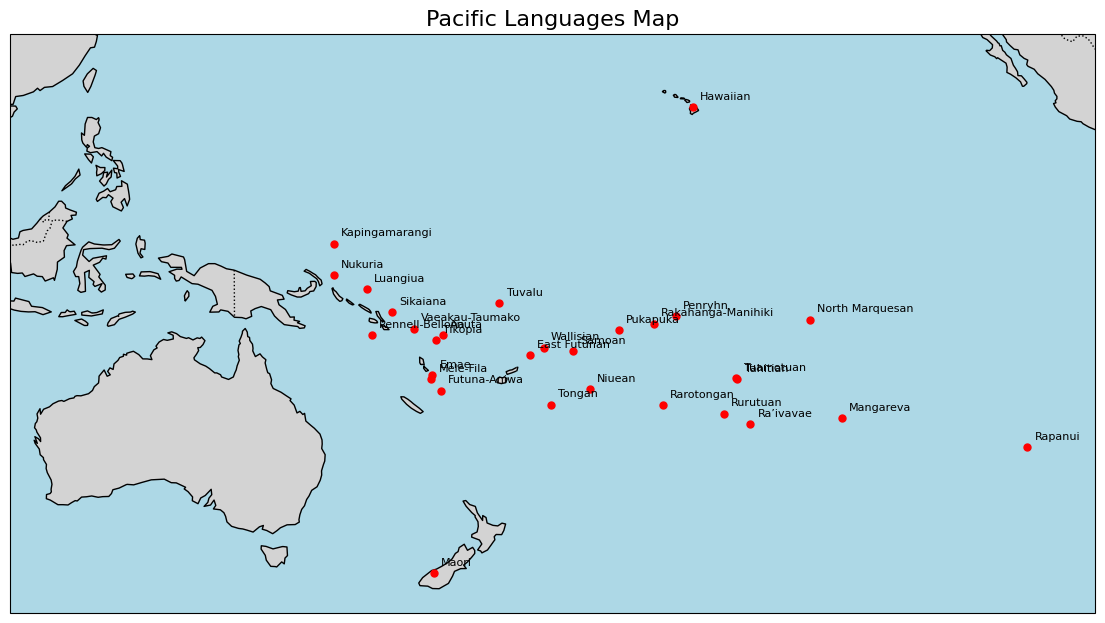

In [228]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming polynesia_geo has columns: 'Language', 'Latitude', 'Longitude'

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Set map extent to roughly cover the Pacific region
ax.set_extent([-250, -100, -50, 30], crs=ccrs.PlateCarree())

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each language point and label it
for idx, row in polynesia_geo.iterrows():
    ax.plot(row['Longitude2'], row['Latitude'], 'o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(row['Longitude2'] + 1, row['Latitude'] + 1, row['Language'], fontsize=8, transform=ccrs.PlateCarree())

plt.title("Pacific Languages Map", fontsize=16)
plt.show()

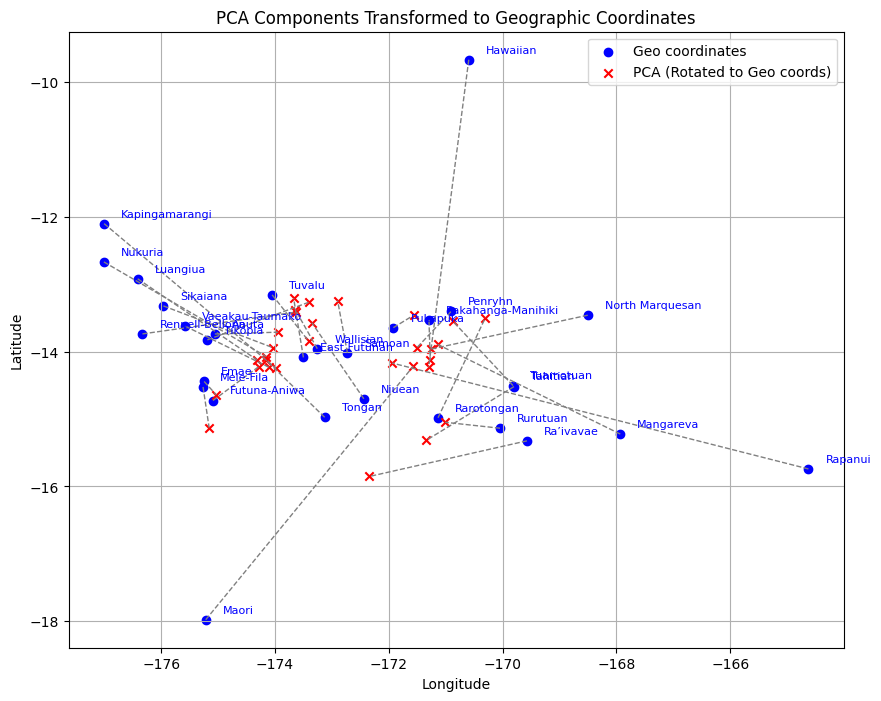

In [238]:
import numpy as np
from scipy.spatial import procrustes

# Original data:
pca_points = components[:, :2]
geo_points = polynesia_geo[['Longitude2', 'Latitude']].to_numpy()

# 1) Mean-center and scale geo_points
geo_mean = geo_points.mean(axis=0)
geo_std = geo_points.std(axis=0)
geo_norm = (geo_points - geo_mean) / geo_std

# 2) Mean-center and scale PCA points
pca_mean = pca_points.mean(axis=0)
pca_std = pca_points.std(axis=0)
pca_norm = (pca_points - pca_mean) / pca_std

# 3) Run procrustes to align normalized PCA to normalized geo
mtx1, mtx2, disparity = procrustes(geo_norm, pca_norm)

# mtx2 are PCA points aligned and scaled in normalized space

# 4) Now **undo the normalization of geo points** to get mtx2 back into geographic coords:
#    (reverse geo scaling on mtx2)
mtx1_original_scale = mtx1 * geo_std + geo_mean
mtx2_original_scale = mtx2 * geo_std + geo_mean

# mtx2_original_scale are PCA points transformed and restored to geographic coordinate system

# Plot for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(mtx1_original_scale[:, 0], mtx1_original_scale[:, 1], c='blue', label='Geo coordinates')
plt.scatter(mtx2_original_scale[:, 0], mtx2_original_scale[:, 1], c='red', marker='x', label='PCA (Rotated to Geo coords)')
for i, lang in enumerate(polynesia_geo['Language']):
    plt.text(mtx1_original_scale[i, 0] + 0.3, mtx1_original_scale[i, 1] + 0.1, lang, fontsize=8, color='blue')
# Add lines connecting original and transformed points
for i in range(len(geo_points)):
    plt.plot(
        [mtx1_original_scale[i, 0], mtx2_original_scale[i, 0]],
        [mtx1_original_scale[i, 1], mtx2_original_scale[i, 1]],
        c='gray', linestyle='--', linewidth=1
    )
plt.title("PCA Components Transformed to Geographic Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

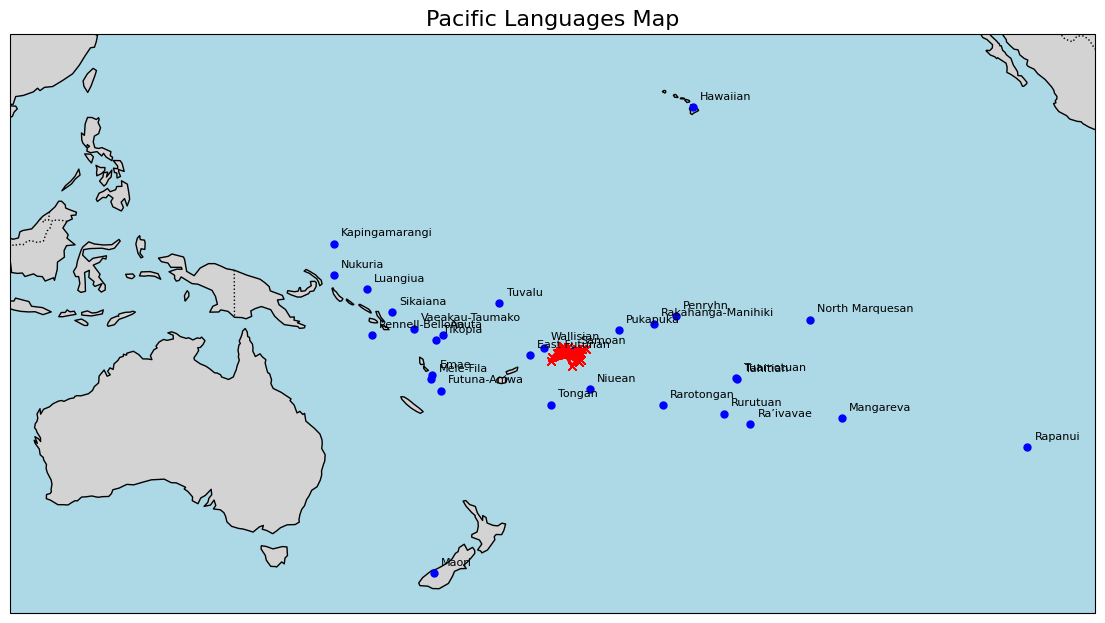

In [244]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming polynesia_geo has columns: 'Language', 'Latitude', 'Longitude'

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Set map extent to roughly cover the Pacific region
ax.set_extent([-250, -100, -50, 30], crs=ccrs.PlateCarree())

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each language point and label it
for idx, row in polynesia_geo.iterrows():
    ax.plot(row['Longitude2'], row['Latitude'], 'o', color='blue', markersize=5, transform=ccrs.PlateCarree())
    ax.text(row['Longitude2'] + 1, row['Latitude'] + 1, row['Language'], fontsize=8, transform=ccrs.PlateCarree())
    plt.plot(mtx2_original_scale[:, 0], mtx2_original_scale[:, 1], c='red', marker='x', label='PCA (Rotated to Geo coords)',transform=ccrs.PlateCarree())

plt.title("Pacific Languages Map", fontsize=16)
plt.show()

# Work on the OCSEAN DATA

This is incomplete.

In [111]:
od = pd.read_table('OCSEAN_initial_joineddata.tsv')
od=od[['ID','concept','form','doculect']]
od=od.dropna()
od['form']=[x.replace('-','') for x in od['form']]
od['form']=[x.replace('=','') for x in od['form']]
od['form']=[re.sub(r'[\d]+', '', x) for x in od['form']]
od['form']=[re.sub(r'[\s]+', '.', x) for x in od['form']]
od = od[od['form'] != '']
od = od[od['form'] != '.']
##od.loc[:,'ID']=od.index+1
print(od.head(15))
print(od.shape)

    ID    concept              form       doculect
0    0        sun             wariy  Abui_Bunggeta
1    1       moon              'uya  Abui_Bunggeta
2    2       star             furiy  Abui_Bunggeta
3    3        sky            'adiiy  Abui_Bunggeta
4    4      Earth              buku  Abui_Bunggeta
5    5      Earth             bukuw  Abui_Bunggeta
6    6      cloud            taboqi  Abui_Bunggeta
7    7       wind            simooi  Abui_Bunggeta
8    8       wind             smooi  Abui_Bunggeta
9    9       rain             anuui  Abui_Bunggeta
10  10    drizzle  anuui.wobiyaanra  Abui_Bunggeta
11  11    drizzle   anuui.wobiyaana  Abui_Bunggeta
12  12    drizzle      anuui.paawal  Abui_Bunggeta
13  13        dew               moo  Abui_Bunggeta
14  14  mist; fog            taboqi  Abui_Bunggeta
(70457, 4)


In [112]:
## Hunting for bad sequences that cannot be converted to IPA
## Print out the "batch number" of a block of 100 that break the algorithm
for i in range(math.floor(len(od)/100)):
    try:
        tmp=convert2ipa(od['form'][(100*i):(100*i+100)])
    except:
        print(i)

In [113]:
## How we investigate a "bad" batch.
i=255
for j in range(2100*i,100*i+100):
    print(od['form'][j]) 
print(list(od['form'][(100*i):(100*i+100)]))
tmp=convert2ipa(od['form'][(100*i):(100*i+100)])

['bekipuur', 'hokku', 'hutan.rimba', 'ku', 'ije', 'ijenuwik', 'dih', 'langit', 'bakkaha', 'kanua', 'kokmim', 'kokmim', 'kila', 'daoh', 'kakie', 'kakder', 'pelangi', 'kanik', 'kanik', "ka'pepe", 'teduh', 'bayangan', 'embun', 'udara', 'ki', 'kikaknakbe', 'awan', 'awankakeeh', 'kabut', 'be', 'bekobari', 'salju', 'es', 'be.es', "e'iem", 'lidah.api', 'percikan', 'kano', 'abu', 'jelaga', 'bara.api', 'uap', 'duduk.pi', 'ku.eiem', 'arang', 'kak', 'man', 'hiur', 'pa', 'kaho', 'pahiur', 'pa', 'pakimebobor', 'pakimekape', 'pamo', 'dar', 'hun', 'pahun', 'pahun', 'am', 'na', 'kaktuo', 'keturunan', 'saudara.man', 'saudara.hiur', "a'man", 'eahman', "aa'hiur", 'eah.hiur', 'eah', "a'", 'kembar', 'datuk', 'nenek', 'anak.cucu', "ku'i", 'kaho', 'wak', 'wak', 'wak', 'wak', 'keponakan', 'sepupu', 'sepupu.dari.pasangan', 'leluhur', 'kamanipa', 'bapak.mertua', 'ibu.mertua', 'anak.mantu.lakilaki', 'anak.mantu.perempuan', 'ipar.lakilaki', 'ipar.perempuan', "da'rah", 'anak.angkat', 'janda', 'u', 'ki', 'ik', 'a',

In [114]:
# Convert to IPA
od['ipa']=convert2ipa(od['form'])
od['doculect']=[re.sub(r"\s+", '_', x) for x in od['doculect']]
od['concept']=[re.sub(r"\s+", '_', x) for x in od['concept']]
od.to_csv('OCSEAN_processed_joineddata.tsv',sep='\t')

In [115]:
ocseanwl = Wordlist('OCSEAN_processed_joineddata.tsv')

In [116]:
ocseanlex = LexStat('OCSEAN_processed_joineddata.tsv',check=True)

2025-05-19 21:39:27,205 [INFO] Data has been written to file <errors.log>.


There were errors in the input data - exclude them? [y/N]  


In [ ]:

# Turn into LexStat and run cognate detection
lex = LexStat(wl)
lex.get_scorer()
lex.cluster(method='lexstat', threshold=0.55, cluster_method='infomap', ref='cogid')

# Print results
for k in lex:
    print(lex[k, 'language'], lex[k, 'concept'], lex[k, 'form'], lex[k, 'cogid'])